# Cross-Country Comparison

## import libraries

In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Cleaned Data


In [2]:
#loading the dataset
benin_df = pd.read_csv('../data/benin-malanville_clean.csv')
sierra_leone_df = pd.read_csv('../data/sierraleone-bumbuna_clean.csv')
togo_df = pd.read_csv('../data/togo-dapaong_clean.csv')

In [3]:
#check the data
print("Benin Data Size: ",benin_df.shape)
print("Sierra Leone Data Size: ",sierra_leone_df.shape)
print("Togo Data Size: ",togo_df.shape)

Benin Data Size:  (525600, 17)
Sierra Leone Data Size:  (525600, 17)
Togo Data Size:  (525600, 17)


In [4]:
# combine the datasets
benin_df['country'] = 'Benin'
sierra_leone_df['country'] = 'Sierra Leone'
togo_df['country'] = 'Togo'
combined_df = pd.concat([benin_df, sierra_leone_df, togo_df], ignore_index=True)
# check the combined data
print("Combined Data Size: ",combined_df.shape)

Combined Data Size:  (1576800, 18)


## Metric Comparison

### Boxplots for GHI, DNI, and DHI

C:\Users\chall\AppData\Local\Temp\ipykernel_15012\4242685845.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


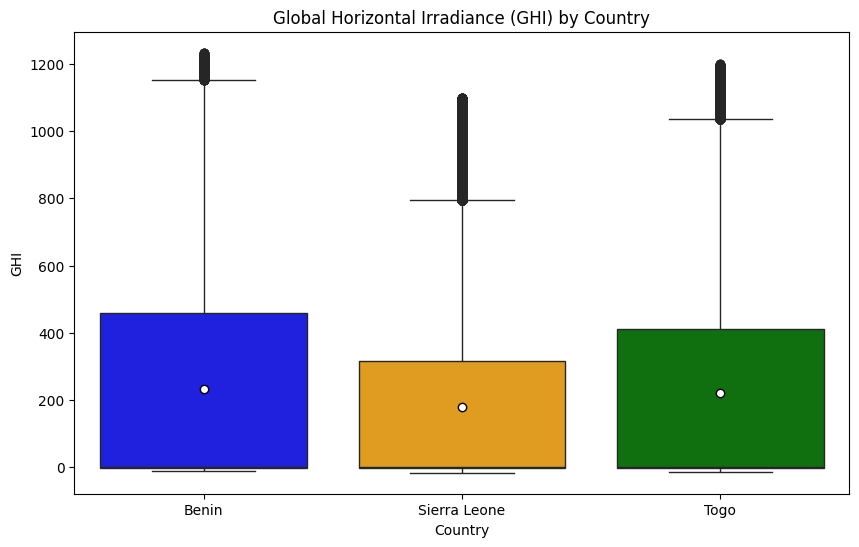

C:\Users\chall\AppData\Local\Temp\ipykernel_15012\4242685845.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


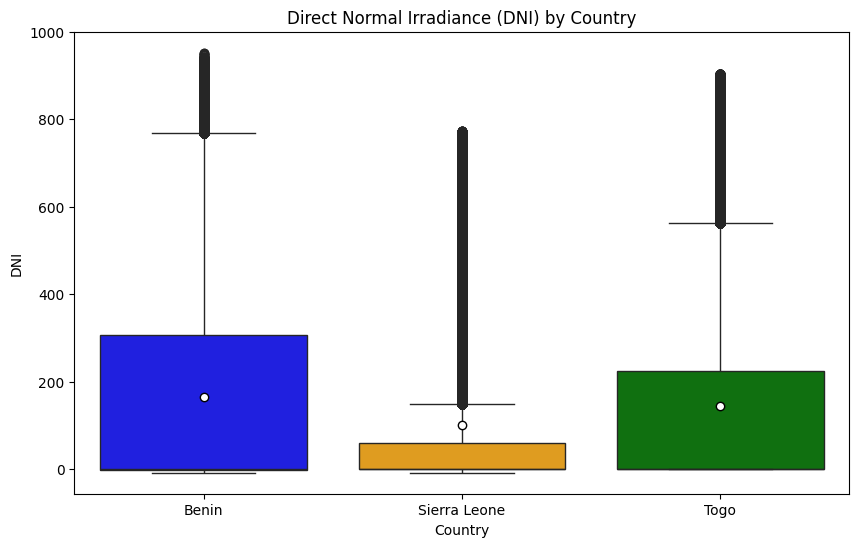

C:\Users\chall\AppData\Local\Temp\ipykernel_15012\4242685845.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


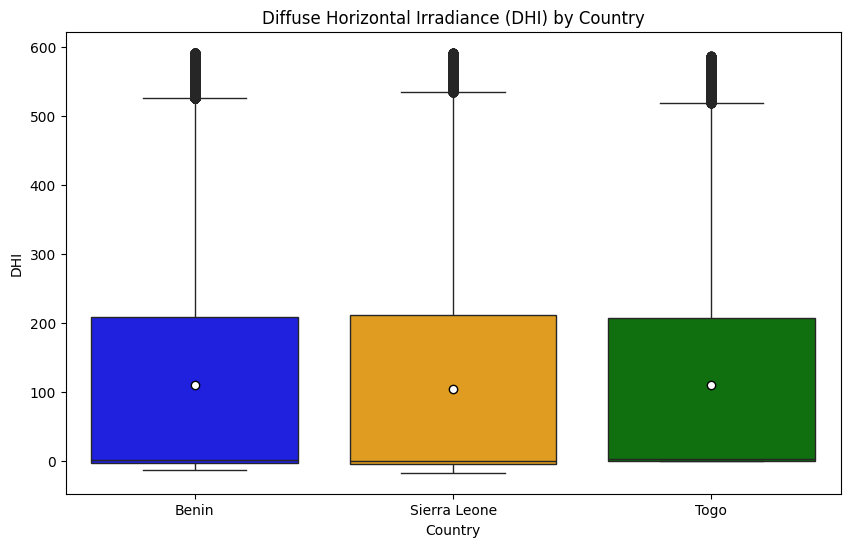

In [12]:
#boxplots of GHI, DNI, and DHI side by side (one per metric, colored by country)
def plot_boxplots(df, metric, title):
    colors = {'Benin': 'blue', 'Sierra Leone': 'orange', 'Togo': 'green'}
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='country', 
        y=metric, 
        data=df, 
        showmeans=True,
        meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}, 
        palette=colors)
    plt.title(title)
    plt.xlabel('Country')
    plt.ylabel(metric)
    plt.show()
#plotting the boxplots
plot_boxplots(combined_df, 'GHI', 'Global Horizontal Irradiance (GHI) by Country')
plot_boxplots(combined_df, 'DNI', 'Direct Normal Irradiance (DNI) by Country')
plot_boxplots(combined_df, 'DHI', 'Diffuse Horizontal Irradiance (DHI) by Country')

### Summary Table (Mean, Median, Std Dev)

In [15]:
# summary comparisons
def summary_statistics(df, metric):
    return df.groupby('country')[metric].agg(['mean', 'median','std']).reset_index()

# call the function of summary statistics for each metric
ghi_summary = summary_statistics(combined_df, 'GHI')
dni_summary = summary_statistics(combined_df, 'DNI')
dhi_summary = summary_statistics(combined_df, 'DHI')

# Display the summary statistics
print("GHI Summary Statistics:\n", ghi_summary)
print("\nDNI Summary Statistics:\n", dni_summary)
print("\nDHI Summary Statistics:\n", dhi_summary)

GHI Summary Statistics:
         country        mean  median         std
0         Benin  232.782219     1.8  327.083885
1  Sierra Leone  179.274886     0.3  276.520057
2          Togo  219.956519     2.1  315.850423

DNI Summary Statistics:
         country        mean  median         std
0         Benin  164.437476    -0.1  260.921667
1  Sierra Leone  100.898163    -0.1  198.638232
2          Togo  145.371431     0.0  246.264222

DHI Summary Statistics:
         country        mean  median         std
0         Benin  110.035783     1.6  152.545413
1  Sierra Leone  104.750275    -0.1  152.448886
2          Togo  110.840206     2.5  150.930197


## Statistical Testing